-----

-----

随着旅游行业的迅速发展，旅客出行住宿需求急剧增加。短租房因其价格优势及独特的用户体验，受到了广泛的关注。近几年来，短租房业务从方兴未艾的星星之火，逐渐成为了传统酒店行业有力的挑战者。与此同时，我们也注意到：不同短租房房源的用户热度差别较大。**这为我们提出了一个问题：短租房房源的用户热度和哪些因素有关？怎样提升房源的用户热度？**  

为了尝试解答以上问题，我们**利用短租房用户评论的数量反映用户热度，并对其影响因素进行分析。**  

本次分析使用了狗熊会提供的短租房数据（**其中包括来自北京市的3811条记录，每条记录包含56个特征**）。
#### **数据中主要包含以下变量**：

|变量类型| 变量名 | 变量介绍                                  |
| ------ | ------ | ------------------------------------------------------ |
| 因变量 | vol_num | 短租房评论数                    |
| 自变量 | price | 价格                                  |
|        | deposit | 押金                                                     |
|        | area | 面积                                                        |
|        | capacity | 宜住人数                                                |
|        | bed | 床数                                                         |
|        | room | 房间数                                                      |
|        | office | 客厅数                                                    |
|        | toilet | 厕所数                                                    |
|        | kitchen | 厨房数                                                   |
|        | balcony | 阳台数                                                   |
|        | history | 累积上线时间（单位：月）                                 |
|        | book_type | 出租类型                                               |
|        | latitude | 纬度                                                    |
|        | longitude | 经度                                                   |
|        | district_with_outer | 城区（四环外各区合并为“其他”）               |
|        | is_foreigner | 是否接待外国人                                      |
|        | is_cook | 是否允许做饭                                             |
|        | is_party | 是否允许聚会                                            |
|        | is_smoke | 是否允许抽烟                                            |
|        | is_parking | 是否有停车位                                          |
|        | is_security | 是否有门禁系统                                       |
|        | is_elevator | 是否有电梯                                           |
|        | is_wifi | 是否有wifi                                               |
|        | is_washing | 是否有洗衣机                                          |
|        | is_refrigerator | 是否有冰箱                                       |
|        | is_soap | 是否提供肥皂                                             |
|        | is_drinkingwater | 是否有饮水机                                    |
|        | is_heating | 是否有暖气                                            |
|        | is_aircondition | 是否有空调                                       |
|        | is_tv | 是否有电视                                                 |
|        | is_hotwater | 是否有热水                                           |
|        | toilet_type | 是否为独立厕所                                       |
|        | rule_n | 入住前多少天可退订                                        |
|        | rule_a | 退订需要扣除前多少天的定金                                |
|        | otherscore_clean | 房主其他房源清洁卫生得分                        |
|        | otherscore_description | 房主其他房源描述相符得分                  |
|        | otherscore_trans | 房主其他房源交通得分                            |
|        | otherscore_safe | 房主其他房源安全得分                             |
|        | otherscore_performance | 房主其他房源性价比得分                    |
|        | subway_num | 附近地铁数量（定性变量，水平为：“3个以上”、“3个以下”）|
|        | hospital_num | 附近是否有医院                                      |
|        | college_num | 附近是否有学校                                       |
|        | scenic_spot_num | 附近是否有景点                                   |
|        | price_landmark_mean | 同商圈短租房平均价格                         |
|        | vol_landmark_mean | 同商圈短租房平均评论数                         |
|        | vol_other_landmark_mean | 同商圈房主平均其他房源评论数             |
|        | sp2 | 同商圈房屋中该短租房价格排名的比例                           |
|        | sp4 | 同商圈房屋中该短租房面积排名的比例                           |
|        | sp6 | 同商圈房屋中该短租房清洁卫生得分排名的比例                   |
|        | sp8 | 同商圈房屋中该短租房描述相符得分排名的比例                   |
|        | sp10 | 同商圈房屋中该短租房交通得分排名的比例                      |
|        | sp12 | 同商圈房屋中该短租房安全得分排名的比例                      |
|        | sp14 | 同商圈房屋中该短租房性价比得分排名的比例                    |
|        | sp16 | 同商圈房屋中该短租房价格面积比排名的比例                    |

#### **本次数据分析工作包含八个部分：**

-----

In [1]:
'''
载入分析中需要使用的包，并设置显示与绘图环境
'''
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
% matplotlib inline
% config InlineBackend.figure_format = 'svg'
matplotlib.rcParams['font.sans-serif'] = ["simhei","Whitney Book"]
pd.set_option('display.precision', 2)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
'''
使用pandas读入短租房数据, 编码设置为GBK中文编码
'''
dat0 = pd.read_csv('data/data.csv', encoding='gbk')

In [4]:
'''
短租房数据概要表
'''
dat0.describe()

,house_id,vol_num,price,deposit,area,capacity,bed,room,office,toilet,...,vol_landmark_mean,vol_other_landmark_mean,sp2,sp4,sp6,sp8,sp10,sp12,sp14,sp16
count,3.81e+03,3811.00,3811.00,3811.00,3811.00,3811.00,3811.00,3811.00,3811.00,3811.00,...,3811.00,3811.00,3811.00,3811.00,3811.00,3811.00,3811.00,3811.00,3811.00,3811.00
mean,7.72e+09,12.31,354.95,346.42,49.63,2.99,1.72,2.09,1.01,1.21,...,7.50,49.01,0.46,0.51,0.43,0.44,0.44,0.47,0.42,0.52
std,5.54e+09,17.64,316.21,299.35,43.04,1.72,1.12,1.31,0.63,0.81,...,2.57,26.84,0.29,0.30,0.34,0.35,0.35,0.36,0.34,0.13
min,1.10e+07,1.00,39.00,0.00,4.00,1.00,1.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2.92e+09,3.00,188.00,200.00,18.00,2.00,1.00,1.00,1.00,1.00,...,5.83,30.65,0.19,0.26,0.00,0.00,0.00,0.00,0.00,0.45
50%,6.32e+09,6.00,299.00,300.00,45.00,2.00,1.00,2.00,1.00,1.00,...,7.04,41.55,0.44,0.53,0.53,0.56,0.57,0.62,0.50,0.54
75%,1.21e+10,15.00,428.00,500.00,65.00,4.00,2.00,3.00,1.00,1.00,...,8.93,66.74,0.70,0.79,0.70,0.71,0.72,0.74,0.71,0.59
max,2.06e+10,219.00,10000.00,7000.00,750.00,10.00,18.00,17.00,6.00,17.00,...,15.69,167.67,0.99,1.00,0.99,0.99,0.99,0.99,0.99,0.98


In [5]:
'''
将样本量记为n
'''
n = len(dat0)

-----

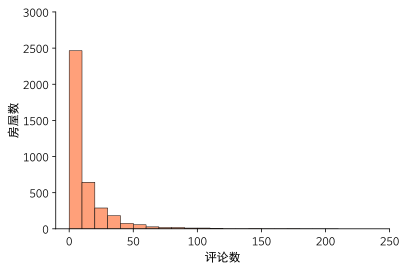

In [6]:
'''
绘制评论数频率直方图
'''
# 建立画布
plt.figure()
# 去除上轴和右轴
sns.despine(ax=plt.gca())
# 绘制频率直方图，使用长度为10的区间
sns.distplot(dat0.vol_num, bins=np.arange(0,dat0.vol_num.max()+1,10),
             kde=False, color='lightsalmon',
             hist_kws={'ec':'k','lw':0.5,'alpha':1})
# 轴标签文字/字体设定
plt.xticks(fontsize=12, **{'fontname':'WhitneyNumeric Book'})
plt.yticks(fontsize=12, **{'fontname':'WhitneyNumeric Book'})
plt.xlim(xmax=plt.gca().get_xticks().max())
plt.ylim(ymax=plt.gca().get_yticks().max())
plt.xlabel('评论数', fontsize=12)
plt.ylabel('房屋数', fontsize=12)
# 显示图片
plt.show()

* 由前文中的数据概要表中可知，数据中房源**评论数最低为1条，最高为219条；房源平均数中位数为6条，均值为12.3条**
* 上图良好地反映了评论数数据的右偏。可以看出，3811条数据中，**有近2500套房源的评论集中在0-10条区间内。**

-----

In [7]:
'''
构造新变量：价格区间(PriceRange) / 面积区间(AreaRange)
'''
dat0['PriceRange'] = pd.cut(dat0.price, bins=[0,300,dat0.price.max()],
                            labels=['小于等于300元','大于300元'])
dat0['AreaRange'] = pd.cut(dat0.area, bins=[0,50,dat0.area.max()],
                           labels=['小于等于50平米','大于50平米'])

In [8]:
'''
定义绘制boxplot的函数
'''
def DrawBoxplot(xstr=None, ystr=None,data=None,order=None,xlabel=None,logscale=True):
    '''
    根据给定的DataFrame绘制箱线图
    ------------------------------
    Parameters
    ----------
    xstr, ystr : (str)
                 names of variables in 'data'
    data       : (DataFrame, array, or list of arrays)
                 Dataset for plotting
    order      : (lists of strings)
                 Order to plot the categorical levels in
    xlabel     : (str)
                 x-axis label name
    logscale   : (boolean)
                 if True, y-axis will be log-scaled.
    '''
    # 建立画布
    plt.figure()
    # 获取当前作图axe
    ax = plt.gca()
    sns.despine(ax=ax)
    # 设置y轴为对数刻度
    if(logscale):
        ax.set_yscale('log')
    # 以评论数为因变量,对不同价格区间绘制boxplot
    sns.boxplot(ax=ax, x=xstr, y=ystr, palette=['lightsalmon','lightgrey'],
                data=data, fliersize=0, saturation=1, order=order)
    # 设定轴上限/标签文字/字体大小
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12, **{'fontname':'WhitneyNumeric Book'})
    ax.tick_params('y',length=8)
    plt.ylim(ymax=100)
    plt.ylabel('评论数', fontsize=13)
    plt.xlabel(xlabel, fontsize=13)
    # 显示图片
    plt.show()

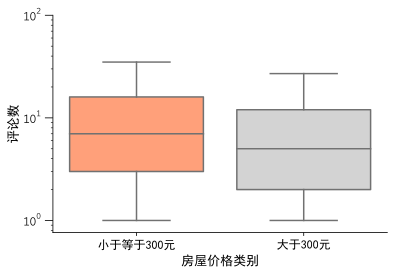

In [9]:
'''
绘制价格区间-评论数箱线图
'''
DrawBoxplot(xstr='PriceRange', ystr='vol_num', data=dat0, order= ['小于等于300元','大于300元'], xlabel='房屋价格类别', logscale=True)

* 从上图中可以看出，房源价格低于或等于300元/天时，房源评论数的**25分位数/中位数/75分位数均明显高于价格高于300元/天的房源**
* 可以推测，**房源价格低于或等于300元/天时，用户热度比高于300元的房源高**

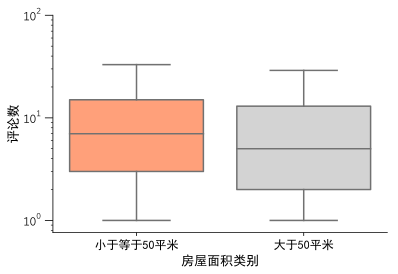

In [10]:
'''
绘制面积区间-评论数箱线图
'''
DrawBoxplot(xstr='AreaRange', ystr='vol_num', data=dat0, order= ['小于等于50平米','大于50平米'], xlabel='房屋面积类别', logscale=True)

* 从上图中可以看出，房源面积低于或等于50平米时，房源评论数的**25分位数/中位数/75分位数均明显高于价格高于300元/天的房源**
* 可以推测，**用户更青睐小户型的房源**

-----

In [11]:
'''
从数据表中按城区分类提取变量
'''
# 各城区房源平均评论数量
nAvgReviewByDist = dat0.groupby('district_with_outer')['vol_num'].mean()
# 各城区房源样本量
nHouseByDist = dat0.groupby('district_with_outer')['house_id'].count()
# 按平均评论数由高至低对两个序列排序
nAvgReviewByDist = nAvgReviewByDist.sort_values(ascending=False)
nHouseByDist = nHouseByDist[nAvgReviewByDist.sort_values(ascending=False).index]

In [12]:
'''
定义：绘制带标签的柱状图函数
'''
def DrawTaggedBar(data=None, valueTag=True, tagData=None, xlabel=None, ylabel=None):
    '''
    根据给定的DataFrame绘制带标签的柱状图
    ---------------------------------
    Parameters
    ----------
    data       : (pd.DataFrame)
                 Dataset for plotting
    valueTag   : (boolean)
                 if True, y-value will be tagged just upon the bars.
    tagData    : (pd.DataFrame)
                 If defined, will tag specified info under valueTags.
                 Dataset for tagging. Dimensionally consistent with 'data'.
    x/ylabel   : (str/str)
                 x/y-axis label name
    '''
    # 建立画布
    plt.figure()
    # 获取当前作图axe
    ax = plt.gca()
    sns.despine(ax=ax)
    # 以平均评论数为因变量,对各城区绘制柱状图
    sns.barplot(ax=ax, x=data.index, y=data.values, color='lightsalmon',
                saturation=1, ec='k', lw=0.5)
    # 添加值标签
    if(valueTag):
        rects = ax.patches
        labels = data.values
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height, '{0:.1f}'.format(label),
                    ha='center', va='bottom', **{'fontname':'Whitney'})
    # 添加样本量标签
    if(tagData is not None):
        labels = tagData.values
        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax.text(rect.get_x() + rect.get_width() / 2, height-1, 'N={0}'.format(label),
                    ha='center', va='bottom', **{'fontname':'Whitney'})
    # 设定轴上限/标签文字/字体大小
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12, **{'fontname':'WhitneyNumeric Book'})
    plt.ylim(ymax=ax.get_yticks().max())
    plt.ylabel(ylabel, fontsize=13)
    plt.xlabel(xlabel, fontsize=13)
    # 显示图片
    plt.show()

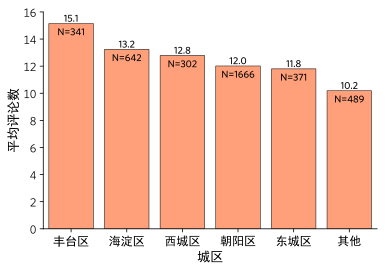

In [13]:
'''绘制带标签与样本量的城区与房源平均评论数直方图'''
DrawTaggedBar(data=nAvgReviewByDist, valueTag=True, tagData=nHouseByDist, xlabel='城区', ylabel='平均评论数')

* 由上图可以看出，**丰台区的房源平均评论数最高，达15.1条/间**。初步推测丰台区房源热度高的**原因是**：北京市许多**大型交通枢纽均位于本区**（如**北京西站、北京南站、南苑机场、木樨园汽车站**等），考虑到短租房的**主要受众是临时来京的租客**，对抵京/离京的**交通便利程度需求较强**，因而导致本区的房源热度较高。
* 除此之外，可以看出**朝阳区的房源样本量远远高于其他城区**。推测其原因有几点：  
（1）**人口多、面积大**：本区为北京市**人口最多**的城区，同时又是是北京市城近郊区中**面积最大**的一个区；  
（2）**居民住宅多**：本区辖内有**多个大型居民聚集区，有足够的房源供给**：如芍药居地区、北苑地区、奥运村地区、亚运村地区、望京地区等。

-----

In [14]:
# 构造房主其它房源性价比/描述一致分值分类变量
dat0['other_perf_type'] = pd.cut(dat0['otherscore_performance'],bins=[0,4.8,5],labels=['小于等于4.8分','高于4.8分'])
dat0['other_desc_type'] = pd.cut(dat0['otherscore_description'],bins=[0,4.8,5],labels=['小于等于4.8分','高于4.8分'])

In [15]:
# 统计各类别平均评论量及房源个数（样本量）
nAvgReviewByPerf = dat0.groupby('other_perf_type')['vol_num'].mean()
nHouseByPerf = dat0.groupby('other_perf_type')['house_id'].count()
nAvgReviewByDesc = dat0.groupby('other_desc_type')['vol_num'].mean()
nHouseByDesc = dat0.groupby('other_desc_type')['house_id'].count()

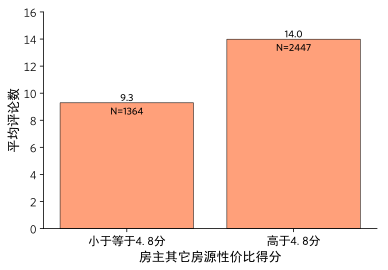

In [16]:
'''绘制房主其它房源性价比得分分类与房源平均评论数直方图'''
DrawTaggedBar(data=nAvgReviewByPerf,valueTag=True,tagData=nHouseByPerf,xlabel='房主其它房源性价比得分',ylabel='平均评论数')

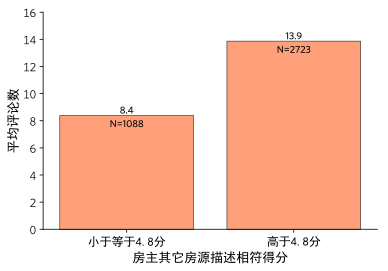

In [17]:
'''绘制房主其它房源描述一致得分分类与房源平均评论数直方图'''
DrawTaggedBar(data=nAvgReviewByDesc,valueTag=True,tagData=nHouseByDesc,xlabel='房主其它房源描述相符得分',ylabel='平均评论数')

* 由上两图可以看出，房主其它房源的性价比与描述相符情况，能够明显反映当前房源的热度
* 房主**其它房源得分高时，当前房源的平均评论数也会较高**
* 推测其原因是，**房主对不同房源的管理模式会较为相似**，因而如果其它房源的评价不高，大概率上此套房源评价也不会高

-----

In [18]:
# 使用statsmodels package来进行回归分析
import statsmodels.api as sm
# 导入formula api可以使statsmodel支持R-like回归语法
import statsmodels.formula.api as smf

In [213]:
# python中没有简单的forward/backward selection函数
# 此处新建立了一个backward selection函数
# 参考 https://planspace.org/20150423-forward_selection_with_statsmodels/
# 增加log-transform功能
def backward_selected(data, response, logtrans=None):
    """
    Linear model designed by **backward** selection.

    Parameters:
    -----------
    data     : (pandas DataFrame)
               with all possible predictors and response
    response : (string)
               name of response column in data
    logtrans : (string / list of string)
               predictors need to be log-transformed

    Returns:
    --------
    model    : an "optimal" fitted statsmodels linear model
               selected by forward selection
               evaluated by BIC
    """
    # 获取特征名List
    dataColumns = list(data.columns)
    # logtrans列表的变量（包括因变量）添加log用于之后回归的公式
    if(logtrans is not None):
        for i,istr in enumerate(dataColumns):
            if(istr in logtrans):
                dataColumns[i] = 'np.log({0})'.format(istr)
    # 设定逐步回归留下/舍弃的变量集合与列表
    remaining = set(dataColumns)
    remaining.remove(response)
    selected = list(remaining)
    # BIC越低越好，初始值定为一个高值
    current_score, best_score = 1e9, 1e9
    # 进行迭代，迭代停止条件：BIC不再减少，或舍弃全部变量
    while remaining and current_score == best_score:
        # 新建/清空（BIC分数，舍弃变量）元组列表
        scores_with_candidates = []
        for candidate in remaining:
            # 按顺序尝试舍弃仍没被舍弃的变量
            sel = remaining.copy()
            sel.remove(candidate)
            sel_list = list(sel)
            # 建立尝试舍弃candidate变量的模型
            formula = "{} ~ {}".format(response,' + '.join(sel_list))
            # score记为本次模型的BIC
            score = smf.ols(formula, data).fit().bic
            # 记录舍弃的变量和相应的BIC
            scores_with_candidates.append((score, candidate))
        # 对记录的（分数，变量）元组列表按分数由低至高进行排序
        scores_with_candidates.sort(reverse=True)
        # 选择BIC分数最高的变量（并将其出栈-移出列表）
        current_score, current_candidate = scores_with_candidates.pop()
        # 如果当前模型BIC表现优于（即低于）历史最佳模型BIC
        if current_score < best_score:
            # 从变量列表中移除本次移除的变量
            remaining.remove(current_candidate)
            # 打印移除变量提示及历史最佳/当前BIC
            print('REMOVED: \'{0}\'. Prev Score: {1:.2f}. Currently {2:.2f}'
                  .format(current_candidate, best_score, current_score))
            # 更新历史最佳BIC
            best_score = current_score
    # 打印选择后的特征变量
    selected = list(remaining)
    print('=========================================')
    print('SELECTED FEATURES:',selected)
    # 根据选择后的特征建立回归公式
    formula = "{} ~ {}".format(response, ' + '.join(selected))
    # 利用statsmodel的OLS(最小二乘)线性回归
    model = smf.ols(formula, data).fit()
    # 返回选择后的优选模型
    return model

In [113]:
# 模型全部输入特征数据（除去house_id及一些上文构造的新变量）
model_full_input = dat0[['vol_num','price', 'deposit', 'area', 'capacity', 'bed',
       'room', 'office', 'toilet', 'kitchen', 'balcony', 'history',
       'book_type', 'latitude', 'longitude', 'district_with_outer',
       'is_foreigner', 'is_cook', 'is_wifi', 'is_party', 'is_washing',
       'is_refrigerator', 'is_smoke', 'is_parking', 'is_security',
       'is_elevator', 'is_soap', 'is_drinkingwater', 'is_heating',
       'is_aircondition', 'is_tv', 'is_hotwater', 'toilet_type', 'rule_n',
       'rule_a', 'otherscore_clean', 'otherscore_description',
       'otherscore_trans', 'otherscore_safe', 'otherscore_performance',
       'subway_num', 'hospital_num', 'college_num', 'scenic_spot_num',
       'price_landmark_mean', 'vol_landmark_mean', 'vol_other_landmark_mean',
       'sp2', 'sp4', 'sp6', 'sp8', 'sp10', 'sp12', 'sp14', 'sp16']]

In [214]:
# 进行后向逐步回归，选择模型特征
mod = backward_selected(data=model_full_input, response='np.log(vol_num)',logtrans=['vol_num','price','history'])

REMOVED: 'district_with_outer'. Prev Score: 1000000000.00. Currently 7748.97
REMOVED: 'bed'. Prev Score: 7748.97. Currently 7740.73
REMOVED: 'kitchen'. Prev Score: 7740.73. Currently 7732.51
REMOVED: 'is_heating'. Prev Score: 7732.51. Currently 7724.29
REMOVED: 'is_security'. Prev Score: 7724.29. Currently 7716.07
REMOVED: 'subway_num'. Prev Score: 7716.07. Currently 7707.86
REMOVED: 'is_refrigerator'. Prev Score: 7707.86. Currently 7699.77
REMOVED: 'office'. Prev Score: 7699.77. Currently 7691.73
REMOVED: 'hospital_num'. Prev Score: 7691.73. Currently 7683.81
REMOVED: 'deposit'. Prev Score: 7683.81. Currently 7675.92
REMOVED: 'room'. Prev Score: 7675.92. Currently 7668.15
REMOVED: 'toilet'. Prev Score: 7668.15. Currently 7660.00
REMOVED: 'is_washing'. Prev Score: 7660.00. Currently 7652.50
REMOVED: 'is_soap'. Prev Score: 7652.50. Currently 7645.02
REMOVED: 'vol_other_landmark_mean'. Prev Score: 7645.02. Currently 7637.96
REMOVED: 'college_num'. Prev Score: 7637.96. Currently 7631.01
R

In [147]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(vol_num)   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     455.3
Date:                Tue, 31 Jul 2018   Prob (F-statistic):               0.00
Time:                        02:16:05   Log-Likelihood:                -3683.0
No. Observations:                3811   AIC:                             7408.
Df Residuals:                    3790   BIC:                             7539.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                 -3.5673      0.379     -9.405      0.000      -4.311      -2.824
book_type[T.整套出租]          0.3035      0.072      4.188      0.000       0.161       0.446
book_type[T.沙发出租]         -0.2129      0.120     -1.779      0.075      -0.448       0.022
book_type[T.独立单间]          0.0248      0.066      0.377      0.706      -0.104       0.154
price_landmark_mean        0.0004      0.000      3.955      0.000       0.000       0.001
otherscore_description     0.6095      0.111      5.468      0.000       0.391       0.828
np.log(history)            0.4298      0.013     33.456      0.000       0.405       0.455
rule_n                     0.0316      0.006      5.428      0.000       0.020       0.043
is_parking                -0.0648      0.022     -3.007      0.003      -0.107      -0.023
vol_landmark_mean          0.0354      0.004      8.487      0.000       0.027       0.044
sp12                       0.5281      0.078      6.751      0.000       0.375       0.681
is_drinkingwater           0.0797      0.025      3.224      0.001       0.031       0.128
sp16                      -0.3523      0.086     -4.073      0.000      -0.522      -0.183
sp6                        0.4833      0.078      6.227      0.000       0.331       0.635
sp8                        0.4360      0.085      5.132      0.000       0.269       0.603
sp10                       0.5485      0.067      8.219      0.000       0.418       0.679
is_smoke                  -0.0733      0.022     -3.300      0.001      -0.117      -0.030
np.log(price)             -0.3023      0.032     -9.529      0.000      -0.364      -0.240
rule_a                    -0.0181      0.006     -2.868      0.004      -0.030      -0.006
otherscore_clean           0.3799      0.101      3.754      0.000       0.181       0.578
area                       0.0011      0.000      3.026      0.002       0.000       0.002
==============================================================================
Omnibus:                       43.436   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               44.712
Skew:                           0.265   Prob(JB):                     1.95e-10
Kurtosis:                       3.020   Cond. No.                     1.44e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* 通过后向逐步回归，用BIC选择了线性回归的模型特征，当前模型包含的特征包括**房源价格、面积、配置、退房要求、商圈情况、房主其它房源情况及出租类型**等变量。
* 模型的调整后R2为0.705，即**选择的特征反映了约70%的因变量的方差**
* 根据特征选择后的回归模型参数，以下特征对因变量（房源评论数）影响较大：其中与评论数**正相关**的包括**房主其它房源描述一致/清洁卫生得分；房源历史；同商圈房屋中该短租房描述相符/交通/卫生/安全得分排名比例**；**负相关**的特征包括**同商圈房屋中该短租房价格面积比排名的比例；房源价格**
* 由上述结果，推断目前用户对短租房的主要偏好是：**清洁、卫生、安全、便利，同时价格要比较亲民**。

-----

* 假定该房源各项条件不变，半年后上线时间为**12个月**，代入各项指标到任务七中的模型中，可以得到：

In [165]:
# 该房源各变量指标
house_var = {
      'book_type':['独立单间'],
      'area':[17],
      'is_smoke':[0],
      'is_parking':[0],
      'is_drinkingwater':[0],
      'rule_n':[4],
      'rule_a':[3],
      'otherscore_clean':[4.7],
      'otherscore_description':[4.9],
      'price_landmark_mean':[350],
      'vol_landmark_mean':[10],
      'sp6':[0.2],
      'sp8':[0.2],
      'sp10':[0.2],
      'sp12':[0.2],
      'sp16':[0.9],
      'history':[12],
      'price':[200]
      }

In [170]:
# 输出预测评论次数
nReview_pred = int(round(np.exp(mod.predict(exog=house_var,transform=True).values[0])))
print(nReview_pred)

4


-----

In [174]:
# 获取模型参数
params = mod.params

In [217]:
'''根据上述模型结果，构造不同变量，反映房源信息'''
# 利用回归模型参数，构造房源信息评价变量
# 基本信息变量
BasicInfo = (params['np.log(price)'] * np.log(house_var['price'][0]) 
             + params['area'] * house_var['area'][0])
# 房屋配置变量
EquipInfo = (params['is_smoke'] * house_var['is_smoke'][0] 
             + params['is_parking'] * house_var['is_parking'][0]
             + params['is_drinkingwater'] * house_var['is_drinkingwater'][0])
# 退房规定变量
RulesInfo = (params['rule_n'] * house_var['rule_n'][0] 
             + params['rule_a'] * house_var['rule_a'][0])
# 其他房源变量
OtherInfo = (params['otherscore_clean'] * house_var['otherscore_clean'][0] 
             + params['otherscore_description'] * house_var['otherscore_description'][0])
# 商圈整体情况变量
NeighborInfo = (params['price_landmark_mean'] * house_var['price_landmark_mean'][0] 
                + params['vol_landmark_mean'] * house_var['vol_landmark_mean'][0])
# 商圈房屋比较变量
NbComparison = (params['sp6'] * house_var['sp6'][0] 
                + params['sp8'] * house_var['sp8'][0] 
                + params['sp10'] * house_var['sp10'][0] 
                + params['sp12'] * house_var['sp12'][0] 
                + params['sp16'] * house_var['sp16'][0])
# 出租类型变量
BookTypeInfo = params[r'book_type[T.独立单间]']

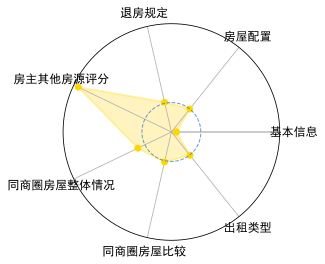

In [218]:
'''
绘制雷达图
'''
# 建立画布
plt.figure()
# 设置图像坐标为极坐标
ax = plt.subplot(1, 1, 1, polar=True)
# 将前文构造的变量及值置入列表
feats = ['基本信息', '房屋配置', '退房规定', '房主其他房源评分',
         '同商圈房屋整体情况', '同商圈房屋比较', '出租类型']
values = [BasicInfo, EquipInfo, RulesInfo, OtherInfo,
          NeighborInfo, NbComparison, BookTypeInfo]
# 特征数
N = len(feats)
# 设置雷达图的角度（等分圆）
angles=np.linspace(0, 2*np.pi, N, endpoint=False)
# 用于生成雷达图
circle=np.linspace(0, 2*np.pi, 200, endpoint=False)
# 将雷达图一圈封闭起来，需要拼合构造的列表首尾
values=np.concatenate((values,[values[0]]))
angles=np.concatenate((angles,[angles[0]]))
# 绘制雷达图
plt.plot(angles, values, 'o-', lw=2, c='gold', alpha=0.3)
# 绘制零值圆
plt.plot(circle, np.zeros_like(circle), '--', lw=1, c='steelblue', alpha=0.8)
# 填充颜色
ax.fill(angles, values, 'gold', alpha=0.25)
# 添加特征标签
ax.set_thetagrids(angles=angles * 180/np.pi, labels=feats, fontsize=12)
plt.yticks([])
# 显示图片
plt.show()

* 上图中，黄色部分反映了**各项指标对房源评论数的影响**
* 位于蓝色虚线圆圈以内的因子带来的是负面影响，其他因子为正面影响，且**离圆心越远影响越大**。
* 因而，从上图我们可以建议房主**适当降低房源的价格；放松退房的限制；为房屋升级配置**，如安装饮水机等